<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/6__deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train_shape (60000, 28, 28)
y_train_shape (60000,)
x_test_shape (10000, 28, 28)
y_test_shape (10000,)
X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)
Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)
Y Training matrix shape (60000, 10)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8791 - loss: 0.4200
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9717 - loss: 0.0900
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9834 - loss: 0.0518
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9887 - loss: 0.0365
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9917 - loss: 0.0252
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9748 - loss: 0.0896
Test score(loss): 0.07831573486328125
Test accuracy(accuracy): 0.9775000214576721
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

predicted_classes length =  10000 
predicted_classes= [7 2 1 ... 4 5 6]

correct_indices length =  9775 
correct_indices= [   0    1    2 ... 9997 9998 9999]

incorrect_indices length =  225 
icorrect_indices= [ 115  149  158  247  340  445  495  582  619  691  707  720  839  844
  877  882  938  947  951  956  962  965  992 1014 1039 1156 1182 1194
 1224 1226 1232 12

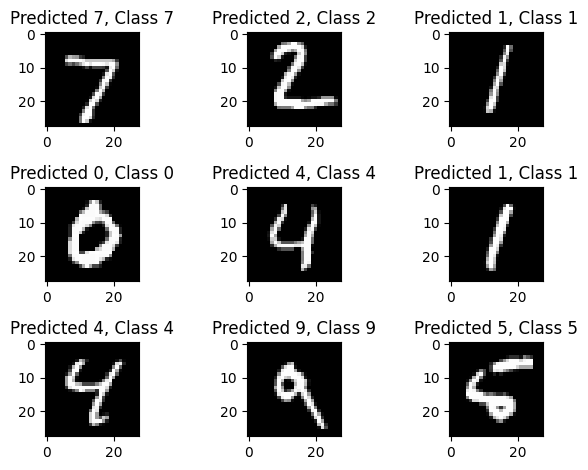

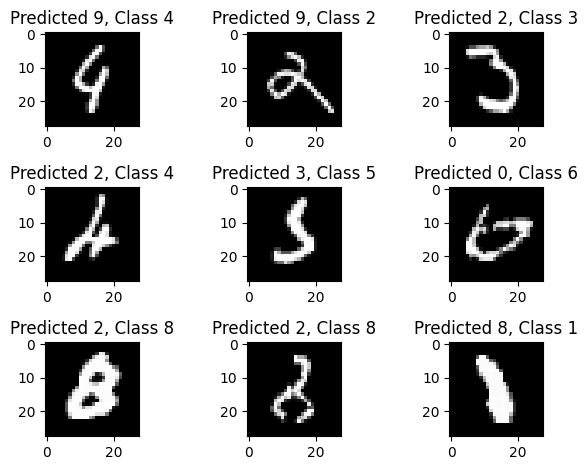

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train_shape', x_train.shape)
print('y_train_shape', y_train.shape)
print('x_test_shape', x_test.shape)
print('y_test_shape', y_test.shape)

X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("X Training matrix shape", X_train.shape)
print("X Testing matrix shape", X_test.shape)

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

"""
to_categorical: Keras의 유틸리티 함수로, 정수 레이블을 원-핫 인코딩 형태로 변환합니다.
원-핫 인코딩은 각 클래스를 이진 벡터로 표현하는 방법입니다.
예를 들어, 클래스 0은 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 클래스 1은 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]와 같이 표현됩니다.
"""
Y_train = to_categorical(y_train, 10)
print("Y Training matrix shape", Y_train.shape)

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=1) #epochs 값을 1부터 증가하면서 보면 Incorrect_indices가 줄어드는 것을 알수있음

score = model.evaluate(X_test, Y_test)
print('Test score(loss):', score[0])
print('Test accuracy(accuracy):', score[1])

"""
- predicted_classes == y_test는 두 배열을 비교하여 요소별로 True 또는 False를 반환합니다.
  True는 예측이 실제 값과 일치할 때 나타납니다.
- np.nonzero(...)는 배열에서 True인 요소의 인덱스를 반환합니다.
- [0]는 이 결과에서 첫 번째 차원에 해당하는 인덱스 값들만 선택합니다
"""
predicted_classes = np.argmax(model.predict(X_test), axis=1)
print("\npredicted_classes length = ", len(predicted_classes), "\npredicted_classes=", predicted_classes)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
print("\ncorrect_indices length = ", len(correct_indices), "\ncorrect_indices=", correct_indices)
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("\nincorrect_indices length = ", len(incorrect_indices), "\nicorrect_indices=", incorrect_indices)

#print(incorrect_indices)

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    correct = correct_indices[i]
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    incorrect = incorrect_indices[i]
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.tight_layout()



In [ ]:
import numpy as np

predicted_classes = np.array([1, 2, 1, 0, 2])
y_test = np.array([1, 0, 1, 0, 1])

# 예측과 실제 값이 일치하는 인덱스 찾기
correct_indices = np.nonzero(predicted_classes == y_test)[0]
print(correct_indices)


[0 2 3]
